### Project Retail Order Analysis 

### Objective
The objective of this project is to analyze retail order data to gain insights into customer behavior, sales performance, and product trends. The analysis will help in making data-driven decisions to improve sales strategies and enhance customer satisfaction. 
- Clean and explore the raw dataset
- Perform SQL-based querying for deeper insights
- Analyze customer segments, shipping trends, and geography
- Visualize key trends using Python libraries



In [73]:
# importing Liraries
import pandas as pd

### Loading and viewing dataset

In [74]:
df = pd.read_csv('orders.csv')

df.head(10)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5
5,6,2022-03-13,Not Available,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,FUR-FU-10001487,50,50,7,3
6,7,2022-12-28,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,OFF-AR-10002833,10,10,4,3
7,8,2022-01-25,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,TEC-PH-10002275,860,910,6,5
8,9,2023-03-23,Not Available,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,OFF-BI-10003910,20,20,3,2
9,10,2023-05-16,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,OFF-AP-10002892,90,110,5,3


#### Handling missing/null values

In [75]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'Not Available', 'unknown',
       'First Class', nan, 'Same Day'], dtype=object)

In [76]:
df =pd.read_csv('orders.csv', na_values= ['Not Available', 'unknown'])

In [77]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', nan, 'First Class', 'Same Day'],
      dtype=object)

#### Renaming the columns 
(make them lowercase and replace spaces with underscores)

In [78]:
df.columns

Index(['Order Id', 'Order Date', 'Ship Mode', 'Segment', 'Country', 'City',
       'State', 'Postal Code', 'Region', 'Category', 'Sub Category',
       'Product Id', 'cost price', 'List Price', 'Quantity',
       'Discount Percent'],
      dtype='object')

In [79]:
# Making columns Lower case
df.columns = df.columns.str.lower()  
df.columns

Index(['order id', 'order date', 'ship mode', 'segment', 'country', 'city',
       'state', 'postal code', 'region', 'category', 'sub category',
       'product id', 'cost price', 'list price', 'quantity',
       'discount percent'],
      dtype='object')

In [80]:
# replacing spaces with underscores
df.columns = df.columns.str.replace( ' ', '_')
df.columns

Index(['order_id', 'order_date', 'ship_mode', 'segment', 'country', 'city',
       'state', 'postal_code', 'region', 'category', 'sub_category',
       'product_id', 'cost_price', 'list_price', 'quantity',
       'discount_percent'],
      dtype='object')

In [81]:
df.head()

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


### Creating Some new Columns like discount, price and profit

In [82]:
# Discount column
df['discount'] = df ['list_price']*df['discount_percent']*.01

In [83]:
# price column
df['sale_price'] = df['list_price']-df['discount']

In [84]:
# profit column
df['profit'] = df['sale_price']-df['cost_price']

In [85]:
df

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent,discount,sale_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,1.0,19.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,30,30,3,4,1.2,28.8,-1.2
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,70,90,2,4,3.6,86.4,16.4
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,220,260,2,2,5.2,254.8,34.8
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,30,30,4,3,0.9,29.1,-0.9


#### converting the data type

In [86]:
df.dtypes

order_id              int64
order_date           object
ship_mode            object
segment              object
country              object
city                 object
state                object
postal_code           int64
region               object
category             object
sub_category         object
product_id           object
cost_price            int64
list_price            int64
quantity              int64
discount_percent      int64
discount            float64
sale_price          float64
profit              float64
dtype: object

In [87]:
df['order_date']= pd.to_datetime(df['order_date'], format= '%Y-%m-%d')

In [88]:
df.dtypes

order_id                     int64
order_date          datetime64[ns]
ship_mode                   object
segment                     object
country                     object
city                        object
state                       object
postal_code                  int64
region                      object
category                    object
sub_category                object
product_id                  object
cost_price                   int64
list_price                   int64
quantity                     int64
discount_percent             int64
discount                   float64
sale_price                 float64
profit                     float64
dtype: object

#### Droping some extra columns
(cost price, list price and discount percent columns)

In [89]:
df.drop(columns=['list_price', 'cost_price', 'discount_percent'] , inplace = True)

In [90]:
df

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,quantity,discount,sale_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,1.0,19.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,3,1.2,28.8,-1.2
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,2,3.6,86.4,16.4
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,2,5.2,254.8,34.8
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,4,0.9,29.1,-0.9


In [91]:
df.isnull().sum()

order_id        0
order_date      0
ship_mode       6
segment         0
country         0
city            0
state           0
postal_code     0
region          0
category        0
sub_category    0
product_id      0
quantity        0
discount        0
sale_price      0
profit          0
dtype: int64

In [92]:
df.to_csv('cleaned_orders.csv', index=False)

### SQL Analysis  with visualization

creating a SQL setup and database

In [93]:
import sqlite3
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv("cleaned_orders.csv")

# Create SQLite database & connection
conn = sqlite3.connect("orders.db")
cursor = conn.cursor()

# Store DataFrame into SQL table
df.to_sql("orders_data", conn, if_exists="replace", index=False)

print("Database successfully created & data loaded into 'orders_data' table.")


Database successfully created & data loaded into 'orders_data' table.


In [94]:
def print_query_result(cursor):
    rows = cursor.fetchall()
    if rows:
        column_names = [description[0] for description in cursor.description]
        print(" | ".join(column_names))
        print("-" * (len(" | ".join(column_names)) + 10))
        for row in rows:
            print(" | ".join(str(item) for item in row))
    else:
        print("No results found.")


In [95]:
import sqlite3

# Correct database file name
conn = sqlite3.connect("orders.db")

# Cursor
cursor = conn.cursor()

# Show columns in 'orders_data' table
cursor.execute("PRAGMA table_info(orders_data)")
columns = cursor.fetchall()

# Print columns
for col in columns:
    print(col)

(0, 'order_id', 'INTEGER', 0, None, 0)
(1, 'order_date', 'TEXT', 0, None, 0)
(2, 'ship_mode', 'TEXT', 0, None, 0)
(3, 'segment', 'TEXT', 0, None, 0)
(4, 'country', 'TEXT', 0, None, 0)
(5, 'city', 'TEXT', 0, None, 0)
(6, 'state', 'TEXT', 0, None, 0)
(7, 'postal_code', 'INTEGER', 0, None, 0)
(8, 'region', 'TEXT', 0, None, 0)
(9, 'category', 'TEXT', 0, None, 0)
(10, 'sub_category', 'TEXT', 0, None, 0)
(11, 'product_id', 'TEXT', 0, None, 0)
(12, 'quantity', 'INTEGER', 0, None, 0)
(13, 'discount', 'REAL', 0, None, 0)
(14, 'sale_price', 'REAL', 0, None, 0)
(15, 'profit', 'REAL', 0, None, 0)


In [96]:
pip install matplotlib seaborn pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


###  SQL Queries

1. Top 5 Cities with Highest Total Sales

In [98]:
query = """
SELECT city, 
       ROUND(SUM(sale_price), 2) AS total_sales
FROM orders_data
GROUP BY city
ORDER BY total_sales DESC
LIMIT 5;
"""
df1 = pd.read_sql_query(query, conn)

df1


,city,total_sales
0,New York City,247205.7
1,Los Angeles,169758.4
2,Seattle,115358.7
3,San Francisco,108890.1
4,Philadelphia,105258.3


C:\Users\FINE LAPTOP\AppData\Local\Temp\ipykernel_10200\678748828.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, x='total_sales', y='city', palette="Blues_d")


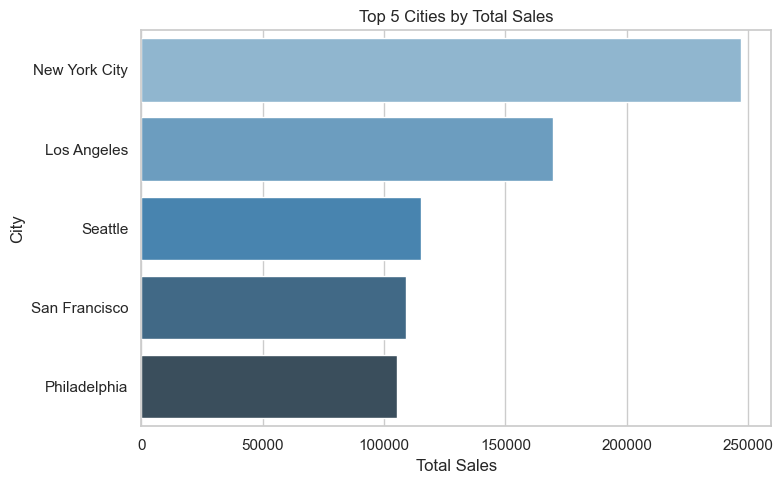

In [99]:
plt.figure(figsize=(8,5))
sns.barplot(data=df1, x='total_sales', y='city', palette="Blues_d")
plt.title("Top 5 Cities by Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("City")
plt.tight_layout()
plt.show()


2. Ship Mode Wise Order Volume & Average Order Value

In [100]:
query = """
SELECT ship_mode,
       COUNT(*) AS total_orders,
       ROUND(AVG(sale_price), 2) AS avg_order_value
FROM orders_data
GROUP BY ship_mode
ORDER BY total_orders DESC;
"""
df2 = pd.read_sql_query(query, conn)

df2


,ship_mode,total_orders,avg_order_value
0,Standard Class,5962,219.23
1,Second Class,1945,227.75
2,First Class,1538,220.57
3,Same Day,543,227.90
4,None,6,471.33


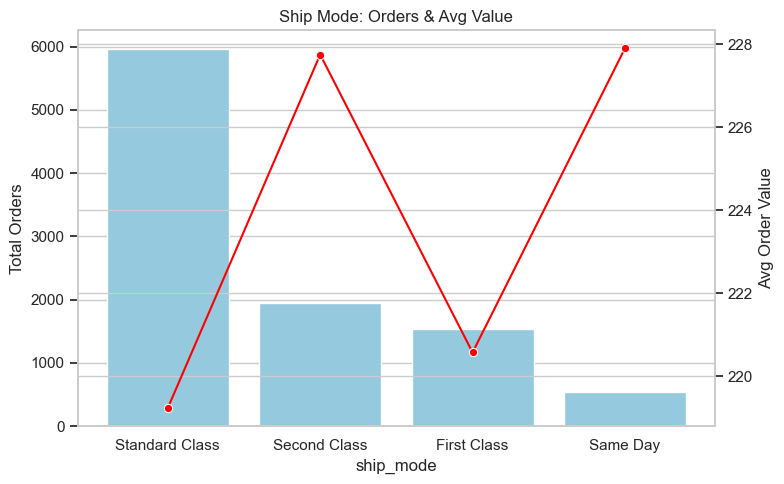

In [101]:
fig, ax1 = plt.subplots(figsize=(8,5))

sns.barplot(data=df2, x='ship_mode', y='total_orders', ax=ax1, color='skyblue')
ax2 = ax1.twinx()
sns.lineplot(data=df2, x='ship_mode', y='avg_order_value', ax=ax2, color='red', marker='o')

ax1.set_ylabel("Total Orders")
ax2.set_ylabel("Avg Order Value")
plt.title("Ship Mode: Orders & Avg Value")
plt.tight_layout()
plt.show()


3. Top Most Profitable Categories

In [102]:
query = """
SELECT category,
       ROUND(SUM(profit), 2) AS total_profit
FROM orders_data
GROUP BY category
ORDER BY total_profit DESC
LIMIT 5;
"""
df3 = pd.read_sql_query(query, conn)

df3

,category,total_profit
0,Technology,76433.5
1,Furniture,66480.7
2,Office Supplies,62254.5


C:\Users\FINE LAPTOP\AppData\Local\Temp\ipykernel_10200\1914666895.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df3, x='total_profit', y='category', palette="Greens_d")


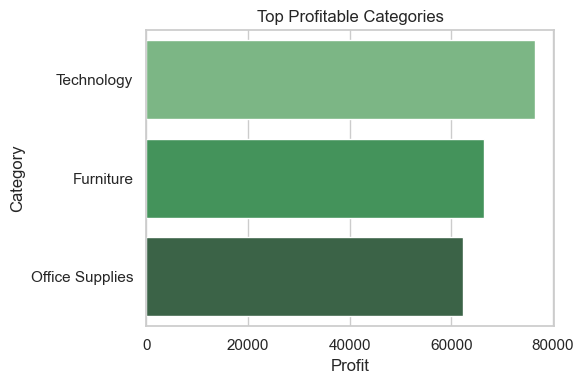

In [103]:
plt.figure(figsize=(6,4))
sns.barplot(data=df3, x='total_profit', y='category', palette="Greens_d")
plt.title("Top Profitable Categories")
plt.xlabel("Profit")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


4. Monthly Sales Trend

In [104]:
query = """
SELECT 
    SUBSTR(order_date, 1, 7) AS month,
    ROUND(SUM(sale_price), 2) AS total_sales
FROM orders_data
GROUP BY month
ORDER BY month;
"""
df4 = pd.read_sql_query(query, conn)

df4

,month,total_sales
0,2022-01,94712.5
1,2022-02,90091.0
2,2022-03,80106.0
3,2022-04,95451.6
4,2022-05,79448.3
5,2022-06,94170.5
6,2022-07,78652.2
7,2022-08,104808.0
8,2022-09,79142.2
9,2022-10,118912.7


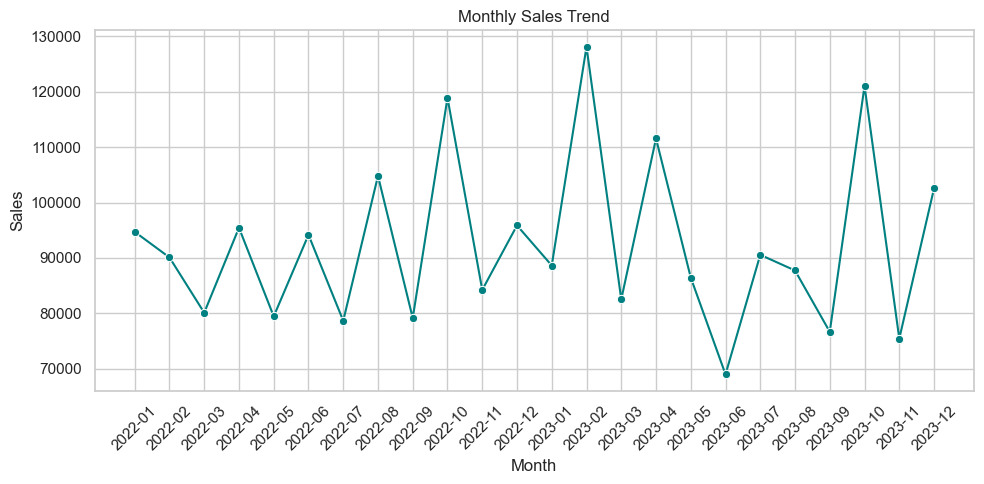

In [105]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df4, x='month', y='total_sales', marker='o', color='teal')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()


5.  State-wise Sales and Profit

In [106]:
query2 = """
SELECT 
    state, 
    ROUND(SUM(sale_price), 2) AS total_sales,
    ROUND(SUM(profit), 2) AS total_profit
FROM orders_data
GROUP BY state
ORDER BY total_sales DESC
LIMIT 10;
"""
df_state = pd.read_sql_query(query2, conn)
df_state

,state,total_sales,total_profit
0,California,441657.0,40207.0
1,New York,299597.5,25557.5
2,Texas,164276.9,14946.9
3,Washington,133779.7,11169.7
4,Pennsylvania,112417.4,10227.4
5,Florida,86071.1,9791.1
6,Illinois,77164.8,6684.8
7,Ohio,75531.4,6871.4
8,Michigan,73519.5,6819.5
9,Virginia,68298.5,6338.5


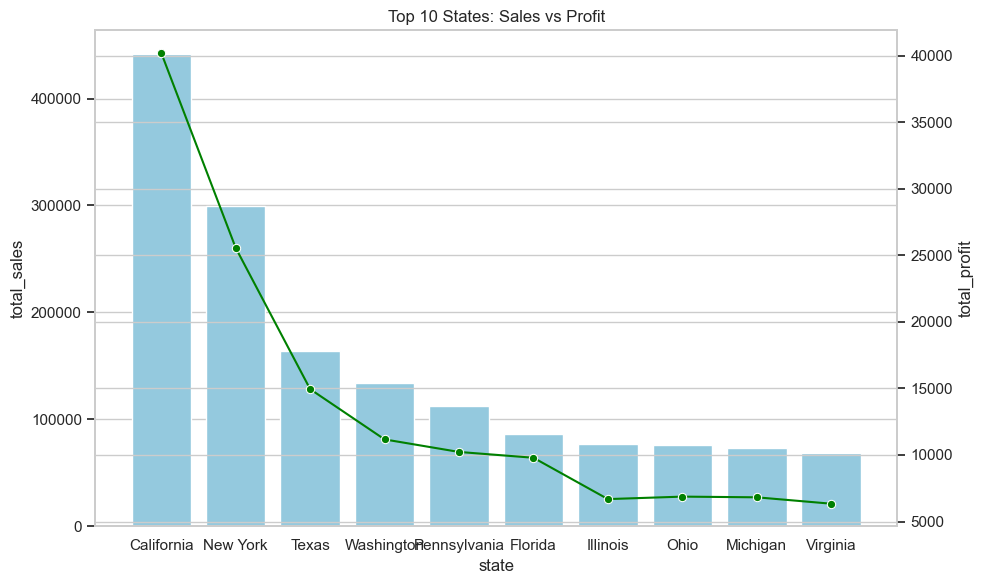

In [107]:
# Visualization
fig, ax1 = plt.subplots(figsize=(10,6))
sns.barplot(data=df_state, x='state', y='total_sales', ax=ax1, color='skyblue')
ax2 = ax1.twinx()
sns.lineplot(data=df_state, x='state', y='total_profit', ax=ax2, color='green', marker='o')
plt.title("Top 10 States: Sales vs Profit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

6. Discount Impact on Profit

In [108]:
query = """
SELECT 
    ROUND(discount, 2) AS discount_rate,
    ROUND(AVG(profit), 2) AS avg_profit
FROM orders_data
GROUP BY discount_rate
ORDER BY discount_rate;
"""
df6 = pd.read_sql_query(query, conn)

df6


,discount_rate,avg_profit
0,0.0,0.0
1,0.2,-0.2
2,0.3,-0.3
3,0.4,-0.4
4,0.5,-0.5
...,...,...
485,409.5,410.5
486,494.5,985.5
487,525.0,1855.0
488,560.0,420.0


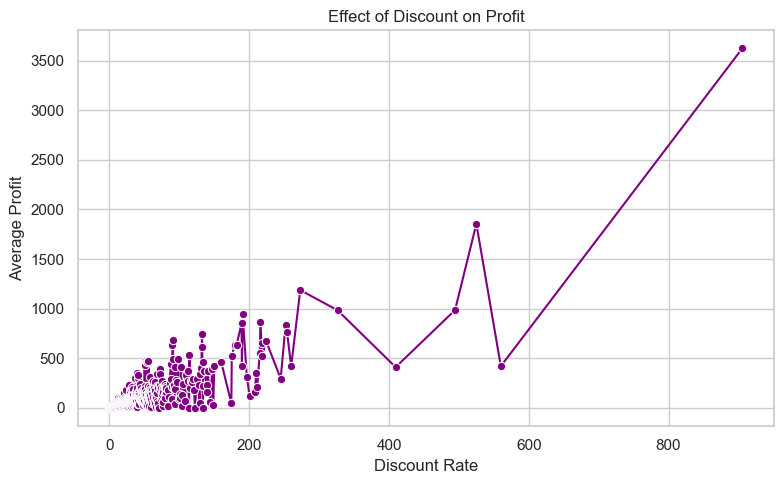

In [109]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df6, x='discount_rate', y='avg_profit', marker='o', color='purple')
plt.title("Effect of Discount on Profit")
plt.xlabel("Discount Rate")
plt.ylabel("Average Profit")
plt.tight_layout()
plt.show()


7. Total Sales vs Total Profit

In [110]:

conn = sqlite3.connect("orders.db")
df = pd.read_sql_query("""
    SELECT 
        ROUND(SUM(sale_price), 2) AS total_sales,
        ROUND(SUM(profit), 2) AS total_profit
    FROM orders_data;
""", conn)
df

,total_sales,total_profit
0,2215858.7,205168.7


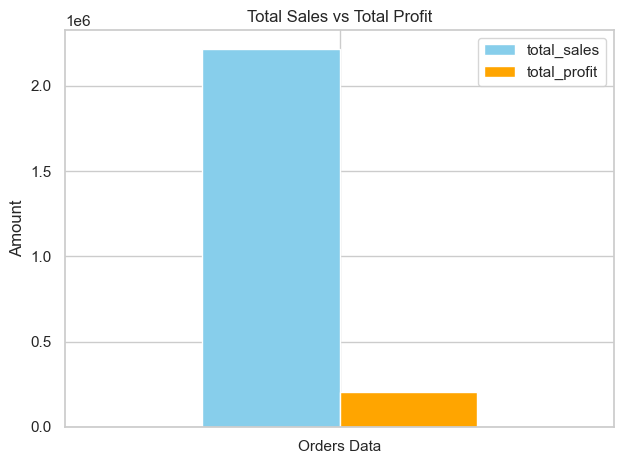

In [111]:
df.plot(kind='bar', rot=0, color=['skyblue', 'orange'])
plt.title("Total Sales vs Total Profit")
plt.ylabel("Amount")
plt.xticks([0], ['Orders Data'])
plt.tight_layout()
plt.show()

8.  Sub-Category Wise Average Profit

In [112]:

query5 = """
SELECT 
    sub_category, 
    ROUND(AVG(profit), 2) AS avg_profit
FROM orders_data
GROUP BY sub_category
ORDER BY avg_profit DESC;
"""
df_sub = pd.read_sql_query(query5, conn)
df_sub

,sub_category,avg_profit
0,Copiers,213.22
1,Machines,157.58
2,Tables,58.28
3,Chairs,48.32
4,Bookcases,46.04
5,Phones,31.91
6,Storage,23.09
7,Appliances,22.03
8,Accessories,19.93
9,Supplies,18.10


C:\Users\FINE LAPTOP\AppData\Local\Temp\ipykernel_10200\2175713239.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sub, x='sub_category', y='avg_profit', palette='coolwarm')


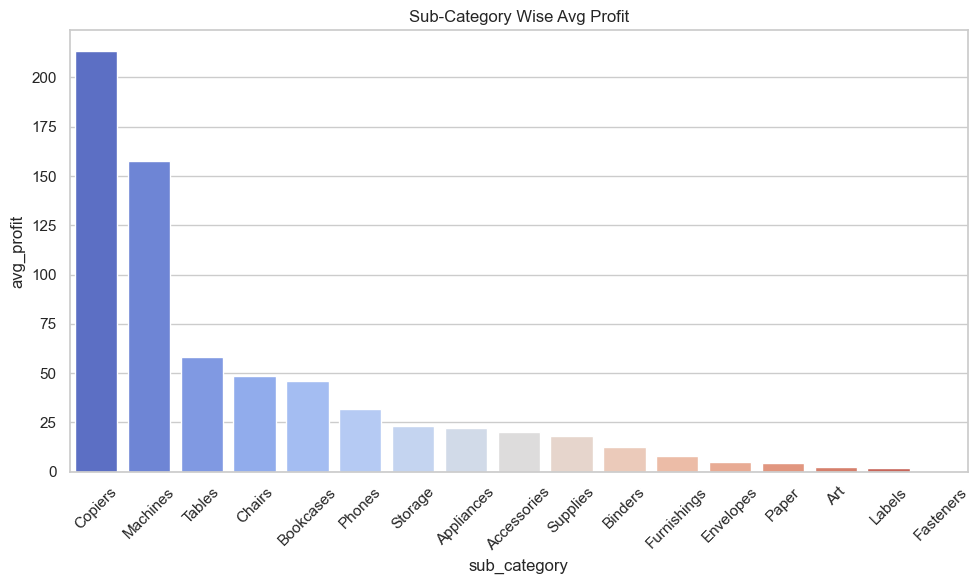

In [113]:
# Visualization
plt.figure(figsize=(10,6))
sns.barplot(data=df_sub, x='sub_category', y='avg_profit', palette='coolwarm')
plt.title('Sub-Category Wise Avg Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

9. Top Selling Product Categories by Quantity

In [114]:

query6 = """
SELECT 
    category, 
    SUM(quantity) AS total_quantity
FROM orders_data
GROUP BY category
ORDER BY total_quantity DESC;
"""
df_qty = pd.read_sql_query(query6, conn)
df_qty

,category,total_quantity
0,Office Supplies,22906
1,Furniture,8028
2,Technology,6939


C:\Users\FINE LAPTOP\AppData\Local\Temp\ipykernel_10200\658127961.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_qty, x='category', y='total_quantity', palette='Set2')


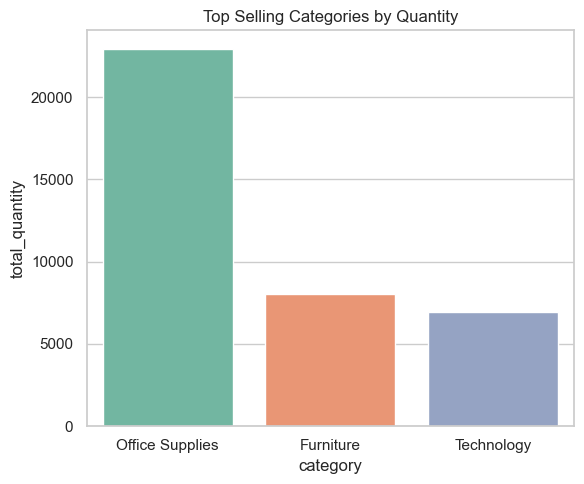

In [115]:
# Visualization
plt.figure(figsize=(6,5))
sns.barplot(data=df_qty, x='category', y='total_quantity', palette='Set2')
plt.title('Top Selling Categories by Quantity')
plt.tight_layout()
plt.show()


## 📌 Conclusion & Key Insights Summary

Here’s a summary of our findings from the Retail Orders dataset:

- **Segment Analysis:** The majority of customers belong to the **Consumer** segment, making it a major revenue driver.
- **Shipping Modes:** **Standard Class** is the most frequently used shipping option, followed by Second Class. Some orders have undefined shipping methods, indicating data gaps.
- **Geographical Trends:** Cities like **Los Angeles**, **New York**, and **Seattle** consistently show high order volumes, suggesting strong regional performance.
- **Temporal Patterns:** Order frequency saw noticeable spikes in 2022 and 2023, suggesting seasonal demand or business growth.
- **Data Gaps:** A few records had missing or unclear values (e.g., "Not Available" in Ship Mode), which were handled during the cleaning process.

This analysis helps identify target segments, optimize shipping operations, and guide regional strategies.
